In [2]:
import pandas as pd
import numpy as np

##### 비만율 데이터 분석

In [3]:
df = pd.read_csv("data/fat_rate.csv")
df.head()

,구분별(1),구분별(2),구분별(3),2009,2009.1,2009.2,2010,2010.1,2010.2,2011,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,구분별(1),구분별(2),구분별(3),전체,남자,여자,전체,남자,여자,전체,...,여자,전체,남자,여자,전체,남자,여자,전체,남자,여자
1,서울시,소계,소계,21.3,27.7,15.2,21.7,28.5,15.1,22.7,...,23.0,28.9,38.6,19.7,28.6,38.5,19.4,29.5,39.7,20.0
2,서울시,생애주기별,19~29세,13.7,21.2,6.2,13.1,21.5,4.6,15.4,...,11.1,23.2,35.1,11.8,23.5,35.1,12.5,24.2,35.3,13.9
3,서울시,생애주기별,30~44세,22.7,34.1,10.9,22.9,34.5,10.9,23.6,...,15.5,31.2,46.7,15.3,31.1,46.7,15.5,33.7,49.8,17.2
4,서울시,생애주기별,45~64세,24.1,27.7,20.7,24.4,28.7,20.3,25.5,...,25.2,30.3,40.6,20.8,30.2,40.5,20.7,29.6,40.0,20.1


In [4]:
df.columns

Index(['구분별(1)', '구분별(2)', '구분별(3)', '2009', '2009.1', '2009.2', '2010',
       '2010.1', '2010.2', '2011', '2011.1', '2011.2', '2012', '2012.1',
       '2012.2', '2013', '2013.1', '2013.2', '2014', '2014.1', '2014.2',
       '2015', '2015.1', '2015.2', '2016', '2016.1', '2016.2', '2017',
       '2017.1', '2017.2', '2018', '2018.1', '2018.2', '2019', '2019.1',
       '2019.2', '2020', '2020.1', '2020.2', '2021', '2021.1', '2021.2',
       '2022', '2022.1', '2022.2'],
      dtype='object')

### 연령대가 19세에서 29세까지의 비만율 데이터만 선택하여 비교

In [5]:
df_target = df[(df["구분별(3)"]=="19~29세")]
target_col = ["2014","2015","2016","2017","2018","2019","2020","2021","2022"]
df_target = df_target[target_col]

#### 비만율이 상승하고 있는 것을 확인할 수 있음

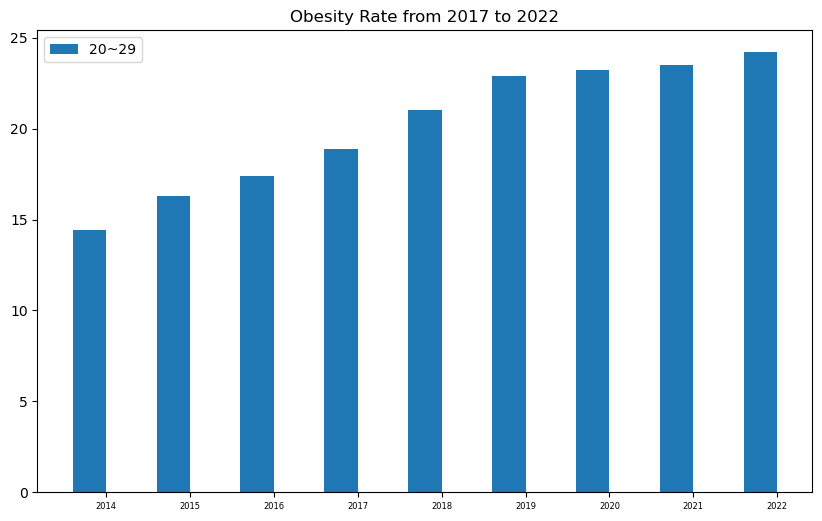

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = df_target.iloc[0, :].values.astype("float")       # 첫 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29")  
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Obesity Rate from 2017 to 2022")
plt.legend()
plt.show()

##### 네이버 검색어 트렌드 데이터 
#### 검색어 : 디저트
#### 데이터를 Min-Max scale을 통한 데이터 전처리가 이미 되어있고, 최소값과 최대값에 대한 정보가 없어 원래값을 알 수 없지만, 지정한 검색어 증가 혹은 감소를 살펴볼 수 있음

In [8]:
df_dessert=pd.read_excel("data/dessert2.xlsx")

/opt/homebrew/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


##### 데이터 전처리

In [9]:
df_dessert = pd.DataFrame(df_dessert.iloc[6:])
colnames = ["date","rate"]
df_dessert = df_dessert.rename(columns = {df_dessert.columns[0]: colnames[0], df_dessert.columns[1]:colnames[1]})
df_dessert

,date,rate
6,2016-01-01,17.64705
7,2016-01-02,18.30065
8,2016-01-03,19.64869
9,2016-01-04,21.69117
10,2016-01-05,22.22222
...,...,...
2549,2022-12-18,46.93627
2550,2022-12-19,42.19771
2551,2022-12-20,44.28104
2552,2022-12-21,46.16013


In [129]:
df_dessert["date"] = pd.to_datetime(df_dessert["date"])
df_dessert["year"] = df_dessert["date"].dt.year
df_dessert["rate"] = df_dessert["rate"].astype("float")
a = df_dessert.groupby("year")["rate"].sum()
a = a.reset_index()
a

,year,rate
0,2016,8341.29728
1,2017,8231.86095
2,2018,9318.42133
3,2019,9771.60768
4,2020,11981.41158
5,2021,13547.01628
6,2022,15374.95732


In [130]:
b = pd.DataFrame([["2014",8341.29728],["2015",8341.29728]],columns=["year","rate"])
b["rate"] = b["rate"].astype("float")
a = pd.concat([b,a]).reset_index()
a['year'] = a["year"].astype('str')

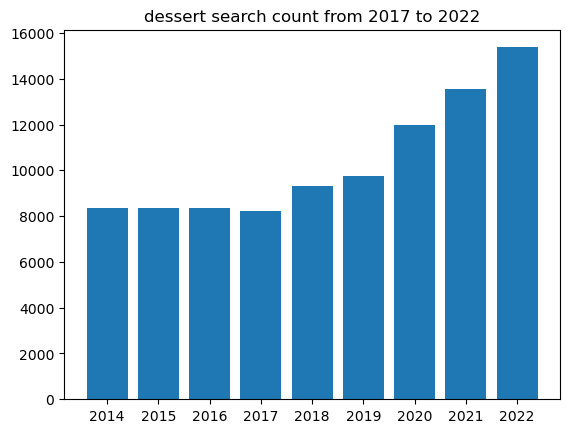

In [37]:
plt.bar(a["year"],a["rate"])
plt.title("dessert search count from 2017 to 2022")
plt.show()

##### 유산소 신체활동 실천율 추이

In [43]:
activity = pd.read_csv("data/유산소_신체활동_실천율_추이_20241224111255.csv",encoding="cp949")
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별(1)   73 non-null     object
 1   특성별(1)  73 non-null     object
 2   특성별(2)  73 non-null     object
 3   2014    73 non-null     object
 4   2014.1  73 non-null     object
 5   2014.2  73 non-null     object
 6   2015    73 non-null     object
 7   2015.1  73 non-null     object
 8   2015.2  73 non-null     object
 9   2016    73 non-null     object
 10  2016.1  73 non-null     object
 11  2016.2  73 non-null     object
 12  2017    73 non-null     object
 13  2017.1  73 non-null     object
 14  2017.2  73 non-null     object
 15  2018    73 non-null     object
 16  2018.1  73 non-null     object
 17  2018.2  73 non-null     object
 18  2019    73 non-null     object
 19  2019.1  73 non-null     object
 20  2019.2  73 non-null     object
 21  2020    73 non-null     object
 22  2020.1  73 non-null     obje

In [44]:
activity.head()

,성별(1),특성별(1),특성별(2),2014,2014.1,2014.2,2015,2015.1,2015.2,2016,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),...,표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차
1,전체,전체,19세이상,4973,57.1,0.9,5065,51.0,1.0,5801,...,0.9,5398,44.0,0.9,5316,44.9,0.9,4861,49.7,1.0
2,전체,전체,19세이상(표준화),4973,58.3,0.9,5065,52.7,1.0,5801,...,1.0,5398,45.6,0.9,5316,47.9,0.9,4861,53.1,1.0
3,전체,연령별1,19-29세,581,72.3,2.0,645,66.7,2.2,667,...,2.1,778,57.8,1.9,658,61.2,2.1,584,69.2,2.1
4,전체,연령별1,30-39세,862,58.0,1.9,695,51.2,2.4,1036,...,2.1,733,47.1,2.2,623,51.0,2.1,611,55.3,2.4


In [45]:
activity["특성별(2)"].unique()

array(['특성별(2)', '19세이상', '19세이상(표준화)', '19-29세', '30-39세', '40-49세',
       '50-59세', '60-69세', '70세이상', '19-64세', '65세이상', '동', '읍면', '하',
       '중하', '중', '중상', '상'], dtype=object)

In [46]:
activity_pr = activity[(activity["특성별(2)"]=="19-29세")]
activity_pr = activity_pr[activity["성별(1)"]=="전체"]
activity_pr

/var/folders/zc/c30_9g954mg8039jzzgzxw4h0000gn/T/ipykernel_4247/1793699304.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  activity_pr = activity_pr[activity["성별(1)"]=="전체"]


,성별(1),특성별(1),특성별(2),2014,2014.1,2014.2,2015,2015.1,2015.2,2016,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
3,전체,연령별1,19-29세,581,72.3,2.0,645,66.7,2.2,667,...,2.1,778,57.8,1.9,658,61.2,2.1,584,69.2,2.1


In [47]:
activity_pr = activity_pr[["특성별(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
activity_pr

,특성별(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
3,19-29세,72.3,66.7,61.9,65.6,63.8,62.1,57.8,61.2,69.2


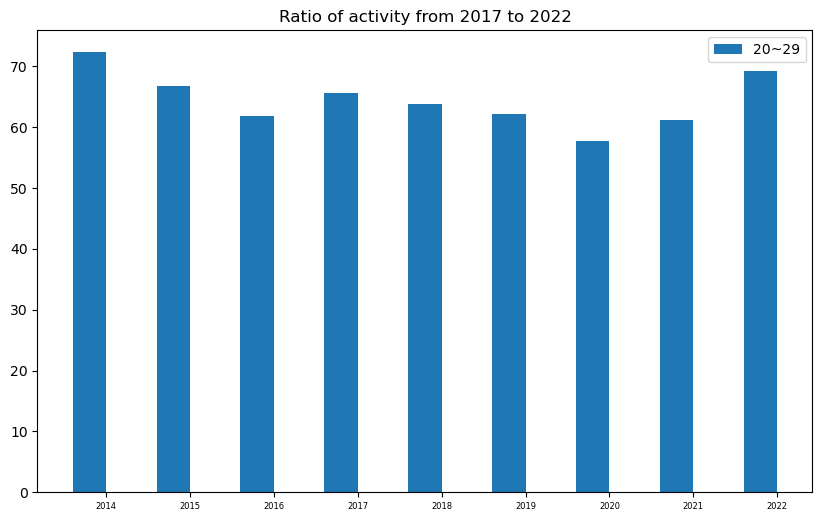

In [48]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = activity_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Ratio of activity from 2017 to 2022")
plt.legend()
plt.show()

##### 규칙적 체육활동 참여 여부 및 빈도 데이터

In [100]:
exercise = pd.read_csv("data/규칙적_체육활동_참여_여부_및_빈도_20241224111528.csv",encoding="cp949")
exercise.head()

,통계분류(1),통계분류(2),통계분류(3),2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,...,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10
0,통계분류(1),통계분류(2),통계분류(3),사례수,전혀하지않는다,월2~3회,주1회,주2회,주3회,주4회,...,월3회 이하,주1회,주2회,주3회,주4회,주5회,주 6회,매일,주1회 이상,주2회 이상
1,전체,소계,소계,9000,34.5,10.8,11.2,10.2,12.7,5.2,...,5.5,10.3,11.9,19.9,6.6,8.4,2,3.2,62.4,52
2,도시규모별,대도시,소계,4005,35.1,10.3,11.4,10.1,13,5.4,...,4.9,10.4,11.6,20.4,6.7,8.4,1.8,2.9,62.3,51.8
3,도시규모별,중소도시,소계,3380,34.4,10.2,11.8,10.5,13.5,4.9,...,6.4,9.6,10.9,19.7,6.5,8.5,2.1,3.2,60.6,50.9
4,도시규모별,읍 면 이하,소계,1615,32.5,14.4,8.8,9.6,9.2,5.4,...,4.9,11.5,14.7,19.1,6.5,8.2,2.2,4.1,66.2,54.7


In [101]:

exercise = exercise[exercise["통계분류(1)"]=="연령별"]
exercise = exercise[(exercise["통계분류(2)"]=="20대")]
exercise = exercise[["통계분류(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
exercise

,통계분류(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
8,20대,36.5,39.6,11.7,14.9,10,7.1,8.8,8.8,9.3


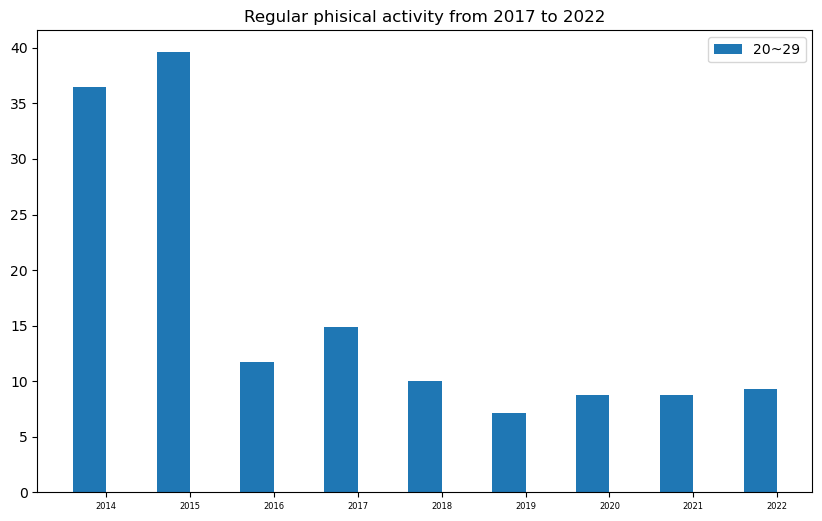

In [102]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = exercise.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("Regular phisical activity from 2017 to 2022")
plt.legend()
plt.show()

##### 음주량 데이터
###### 연령대 구분이 되어있지 않아서 사용하기 어려움

In [86]:
drink_amount = pd.read_csv("data/음주량_20241223120827.csv", encoding="cp949")
drink_amount.head()

,음주량별,2010,2010.1,2010.2,2011,2011.1,2011.2,2012,2012.1,2012.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,음주량별,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반,...,일반,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반
1,1~2잔 정도,25.10,30.90,24.30,23.56,27.58,23.03,22.96,29.97,22.10,...,24.02,25.28,26.82,25.11,24.29,27.07,24.00,22.87,26.22,22.58
2,3~4잔 정도,26.80,27.80,26.60,25.47,27.37,25.22,24.30,25.40,24.16,...,22.98,23.80,26.02,23.56,23.44,24.84,23.29,23.81,25.70,23.64
3,5~6잔 정도,17.00,14.30,17.40,16.07,13.34,16.43,15.14,16.14,15.02,...,13.35,14.62,16.26,14.44,14.70,12.85,14.90,19.56,17.25,19.76
4,7~9잔 정도,19.50,19.30,19.50,22.46,19.44,22.86,22.53,18.18,23.07,...,21.30,19.89,17.54,20.15,21.58,22.25,21.51,18.90,17.96,18.98


##### 연간 음주율 추이 데이터

In [87]:
drink = pd.read_csv("data/연간_음주율_추이_20241223121009.csv", encoding="cp949")
drink.head()

,성별(1),특성별(1),특성별(2),2010,2010.1,2010.2,2011,2011.1,2011.2,2012,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),...,표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차
1,전체,전체,19세이상,6198,77.7,0.7,6008,77.5,0.8,5591,...,0.8,5861,74.1,0.9,5636,72.4,0.9,5257,74.3,0.9
2,전체,전체,19세이상(표준화),6198,79.1,0.6,6008,79.3,0.6,5591,...,0.7,5861,78.1,0.7,5636,76.9,0.8,5257,78.9,0.7
3,전체,연령별1,19-29세,759,89.0,1.3,676,91.6,1.2,637,...,1.5,798,87.7,1.3,673,88.6,1.5,613,88.0,1.6
4,전체,연령별1,30-39세,1238,87.1,1.1,1093,86.5,1.2,960,...,1.4,766,85.9,1.5,646,84.7,1.7,664,85.8,1.6


In [95]:
drink_pr = drink[(drink["특성별(1)"]=="연령별1") & (drink["성별(1)"]=="전체")]
drink_pr = drink_pr[(drink_pr["특성별(2)"]=="19-29세")]
drink_pr = drink_pr[["특성별(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
drink_pr

,특성별(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
3,19-29세,89.3,89.2,89.2,89.3,87.6,89.8,87.7,88.6,88.0


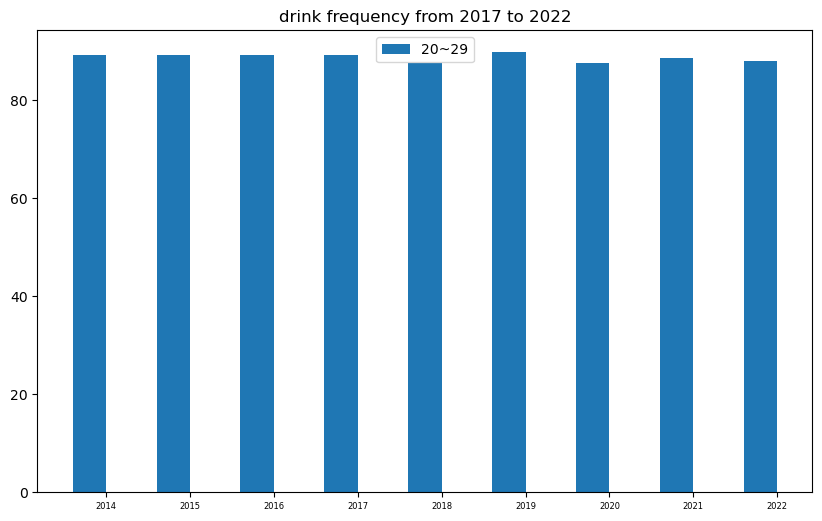

In [155]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = drink_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29")
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("drink frequency from 2017 to 2022")
plt.legend()
plt.show()

##### 에너지 지방 과잉 섭취자 분율 추이

In [104]:
energy = pd.read_csv("data/에너지_지방과잉섭취자_분율_추이_20241224111641.csv",encoding="cp949")
energy.head()

,성별(1),특성별(1),특성별(2),2014,2014.1,2014.2,2015,2015.1,2015.2,2016,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,성별(1),특성별(1),특성별(2),응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),...,표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차,응답자수 (명),분율 (%),표준오차
1,전체,전체,1세이상,6801,8.5,0.4,6628,9.7,0.5,7040,...,0.4,5808,6.8,0.4,5940,5.6,0.4,5830,5.5,0.4
2,전체,전체,19세이상,5322,8.8,0.5,5306,10.2,0.6,5430,...,0.4,4804,6.8,0.5,4973,5.6,0.4,4949,5.5,0.4
3,전체,전체,1세이상(표준화),6801,8.9,0.5,6628,10.3,0.5,7040,...,0.4,5808,7.5,0.5,5940,6.2,0.5,5830,5.8,0.4
4,전체,전체,19세이상(표준화),5322,9.4,0.6,5306,11.3,0.6,5430,...,0.5,4804,7.7,0.5,4973,6.4,0.5,4949,5.9,0.5


In [105]:
energy_pr = energy[(energy["특성별(1)"]=="연령별1") & (energy["성별(1)"]=="전체")]
energy_pr = energy_pr[(energy_pr["특성별(2)"]=="19-29세")]
energy_pr = energy_pr[["특성별(2)","2014.1","2015.1","2016.1","2017.1","2018.1","2019.1","2020.1","2021.1","2022.1"]]
energy_pr

,특성별(2),2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
7,19-29세,10.4,16.8,8.6,7.4,7.3,9.9,5.9,9.0,7.5


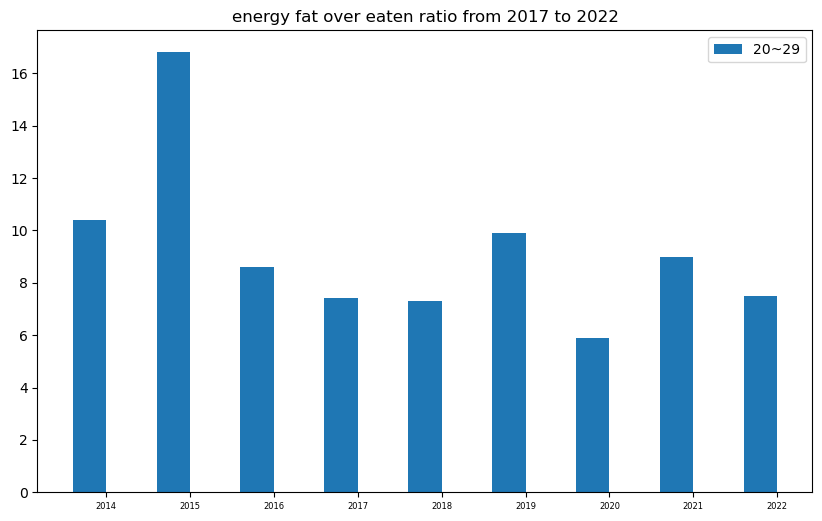

In [106]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
y1 = energy_pr.iloc[0, 1:].values.astype("float")       # 첫 번째 데이터 세트
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, y1, width=width, label="20~29") 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title("energy fat over eaten ratio from 2017 to 2022")
plt.legend()
plt.show()

##### 영양소별 1일 섭취량 추이 표준화 데이터

In [109]:
nutrition = pd.read_csv("data/영양소별_1일_섭취량_추이_표준화___만19세이상_20241223121447.csv")
nutrition

,성별(1),영양소별(1),영양소별(2),2010,2010.1,2011,2011.1,2012,2012.1,2013,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,성별(1),영양소별(1),영양소별(2),평균,표준오차,평균,표준오차,평균,표준오차,평균,...,평균,표준오차,평균,표준오차,평균,표준오차,평균,표준오차,평균,표준오차
1,전체,에너지 (kcal),소계,2126.0,18.4,2090.9,19.3,2057.1,22.6,2135.7,...,2042.6,19.4,2004.7,19.1,1959.2,19.6,1899.5,19.0,1862.8,16.5
2,전체,단백질 (g),소계,77.5,0.8,76.4,1.0,75.3,1.0,74.2,...,74.8,0.8,75.5,0.9,74.3,0.9,74.0,0.9,72.1,0.7
3,전체,지방 (g),소계,45.5,0.6,45.8,0.8,46.5,0.8,48.3,...,49.3,0.7,52.6,0.8,54.2,0.9,51.5,0.8,52.3,0.7
4,전체,포화지방산 (g),소계,-,-,-,-,-,-,14.2,...,16.0,0.3,17.0,0.3,17.5,0.3,16.5,0.3,16.6,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,여자,엽산 (㎍DFE),소계,-,-,-,-,-,-,-,...,275.9,3.7,277.8,3.9,265.8,3.9,267.9,3.7,269.5,3.6
90,여자,비타민C (mg),소계,106.8,3.1,103.3,2.4,106.2,3.2,98.6,...,54.7,1.5,66.0,2.2,60.3,1.8,59.8,1.8,66.9,2.9
91,여자,급원별 에너지 섭취분율 (%),단백질,14.3,0.1,14.3,0.1,14.5,0.1,14.0,...,15.0,0.1,15.4,0.1,15.2,0.1,15.8,0.2,16.0,0.1
92,여자,급원별 에너지 섭취분율 (%),지방,17.9,0.2,18.6,0.2,19.1,0.2,19.9,...,21.7,0.2,23.3,0.2,24.5,0.3,24.4,0.3,25.9,0.2


In [110]:
nutrition_pr = nutrition[(nutrition["영양소별(1)"]=="당 (g)")&(nutrition["성별(1)"]=="전체")]
nutrition_pr = nutrition_pr[["2014","2015","2016","2017","2018","2019","2020","2021","2022"]]
nutrition_pr 

,2014,2015,2016,2017,2018,2019,2020,2021,2022
12,-,-,67.9,64.1,59.2,62.2,58.4,57.6,58.0


###### 2014,2015년 양년의 값을 2016~2022년으로 결측치 대치

In [131]:
answer = 0
for col in nutrition_pr.columns:
    if col != '2014' and col != '2015':
        answer += float(nutrition_pr[col].iloc[0])
mean = answer/7

In [132]:
nutrition_pr['2014'],nutrition_pr['2015'] = mean,mean

/var/folders/zc/c30_9g954mg8039jzzgzxw4h0000gn/T/ipykernel_4247/2152130018.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


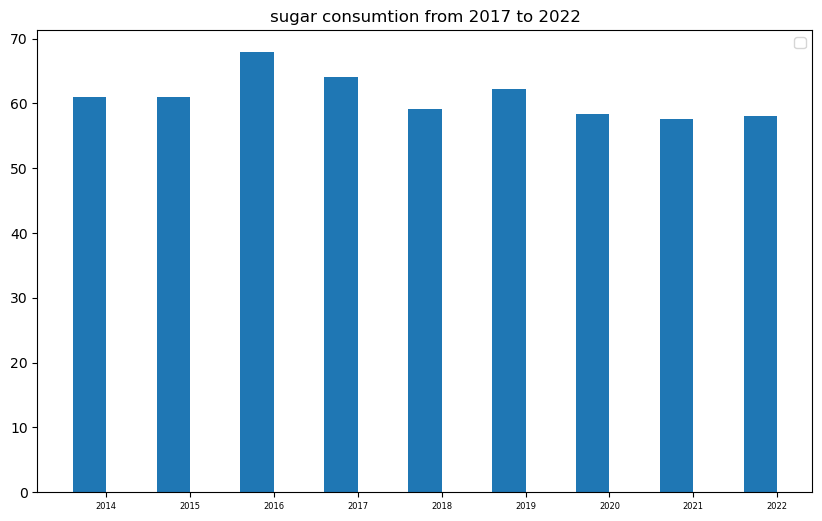

In [133]:
x = np.arange(len(df_target.columns))  # 막대의 x좌표
width = 0.4    
plt.figure(figsize= (10,6))
plt.bar(x - width/2, nutrition_pr.iloc[0,:].values.astype('float'), width=width) 
plt.ylim(0,None)
plt.xticks(x, df_target.columns, fontsize = 6)
plt.title('sugar consumtion from 2017 to 2022')
plt.legend()
plt.show()

##### 식품별 체중(kg)당 섭취량 분포

In [58]:
data_dict = {}
for i in range(2017, 2022):
    file_path = f'data/{i} 식품별  체중kg당 섭취량분포-섭취자- 연령층별(전체) (19-29).csv'
    data_dict[f'data_{i}'] = pd.read_csv(file_path)
food_2017 =data_dict["data_2017"]
food_2018 =data_dict["data_2018"]
food_2019 =data_dict["data_2019"]
food_2020 =data_dict["data_2020"]
food_2021 =data_dict["data_2021"]

In [59]:
food_2017.head()

,식품군,식품,평균(g),표준오차(g),p1(g),p5(g),p10(g),p25(g),p50(g),p75(g),p90(g),p95(g),p99(g),n
0,곡류,귀리,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.13,590
1,곡류,기장,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,590
2,곡류,"메밀국수/냉면국수,생것",0.03,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.42,590
3,곡류,"메밀국수/냉면국수,삶은것",0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,590
4,곡류,"메밀국수/냉면국수,말린것",0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,590


In [74]:
print(food_2017['식품군'].unique())
print(food_2018['식품군'].unique())
print(food_2019['식품군'].unique())
print(food_2020['식품군'].unique())
print(food_2021['식품군'].unique())

['곡류' '감자류' '당류' '두류' '종실류' '채소류' '버섯류' '과일류' '해조류' '양념류' '유지류(식물성)' '육류'
 '난류' '어패류' '우유류' '유지류(동물성)' '기타(동물성)' '음료류' '주류']
['곡류' '감자류' '당류' '두류' '종실류' '채소류' '버섯류' '과일류' '해조류' '양념류' '유지(식물)' '육류'
 '난류' '어패류' '우유류' '유지(동물)' '음료류' '주류']
['곡류' '감자류' '당류' '두류' '종실류' '채소류' '버섯류' '과일류' '해조류' '양념류' '유지(식물)' '육류'
 '난류' '어패류' '우유류' '유지(동물)' '음료류' '주류']
['곡류 및 그 제품' '감자 및 전분류' '당류 및 그 제품' '두류 및 그 제품' '종실류 및 그 제품' '채소류' '버섯류'
 '과실류' '해조류' '음료류' '주류' '조미료류' '유지류(식물성)' '기타(식물성)' '육류 및 그 제품' '난류' '어패류'
 '우유류 및 그 제품' '유지류(동물성)']
['곡류 및 그 제품' '감자 및 전분류' '당류 및 그 제품' '두류 및 그 제품' '종실류 및 그 제품' '채소류' '버섯류'
 '과실류' '해조류' '음료류' '주류' '조미료류' '유지류(식물성)' '기타(식물성)' '육류 및 그 제품' '난류' '어패류'
 '우유류 및 그 제품' '유지류(동물성)']


In [60]:
sugar_row = ["설탕","꿀","당밀/시럽","물엿/조청", "사탕","젤리","잼,딸기","초콜릿","빵,기타", "빵,도우넛", "과자,비스켓,쿠키",
       "샌드위치", "과자,스낵과자", "빵,잼,팥소 등", "빵,식빵", "초코파이", "빵,카스테라", "케이크",
       "케이크,생크림", "빵,크로켓"]
food_2017_pr = food_2017[food_2017["식품"].isin(sugar_row)]
food_2018_pr = food_2018[food_2018["식품"].isin(sugar_row)]
food_2019_pr = food_2019[food_2019["식품"].isin(sugar_row)]
food_2020_pr = food_2020[food_2020["식품"].isin(sugar_row)]
food_2021_pr = food_2021[food_2021["식품"].isin(sugar_row)]

In [66]:
a,b,c,d,e = food_2017[food_2017["식품군"]=="당류"]["식품"],food_2018[food_2018["식품군"]=="당류"]["식품"],food_2019[food_2019["식품군"]=="당류"]["식품"],food_2020[food_2020["식품군"]=="당류"]["식품"],food_2021[food_2021["식품군"]=="당류"]["식품"]

##### 2018년도 데이터에 설탕이 중복입력 되어 있어 232번 행 삭제

In [95]:
print(f'2017 \n {food_2017[food_2017["식품"]=="설탕"]} \n')
print(f'2018 \n {food_2018[food_2018["식품"]=="설탕"]}\n')
print(f'2019 \n {food_2019[food_2019["식품"]=="설탕"]}\n')
print(f'2020 \n {food_2020[food_2020["식품"]=="설탕"]}\n')
print(f'2021 \n {food_2021[food_2021["식품"]=="설탕"]}\n')


2017 
    식품군  식품  평균(g)  표준오차(g)  p1(g)  p5(g)  p10(g)  p25(g)  p50(g)  p75(g)  \
59  당류  설탕   0.07     0.01    0.0    0.0     0.0     0.0    0.01    0.07   

    p90(g)  p95(g)  p99(g)    n  
59    0.17    0.34    0.78  590   

2018 
     식품군  식품  평균(g)  표준오차(g)  p1(g)  p5(g)  p10(g)  p25(g)  p50(g)  p75(g)  \
37   당류  설탕   0.06      0.0    0.0    0.0     0.0    0.01    0.03    0.07   
232  당류  설탕   0.06      0.0    0.0    0.0     0.0    0.01    0.03    0.07   

     p90(g)  p95(g)  p99(g)    n  
37     0.13    0.19     0.4  450  
232    0.13    0.19     0.4  450  

2019 
    식품군  식품  평균(g)  표준오차(g)  p1(g)  p5(g)  p10(g)  p25(g)  p50(g)  p75(g)  \
36  당류  설탕   0.07      0.0    0.0    0.0     0.0    0.01    0.03    0.07   

    p90(g)  p95(g)  p99(g)    n  
36    0.16    0.22    0.53  407  

2020 
           식품군  식품  평균(g)  표준오차(g)  p1(g)  p5(g)  p10(g)  p25(g)  p50(g)  \
35  당류 및 그 제품  설탕   0.06     0.01    0.0    0.0     0.0    0.01    0.03   

    p75(g)  p90(g)  p95(g)  p99(g)    

In [96]:
sugar_2017 = food_2017[food_2017["식품"]=="설탕"] 
sugar_2018 = food_2018[food_2018["식품"]=="설탕"]
sugar_2019 = food_2019[food_2019["식품"]=="설탕"]
sugar_2020 = food_2020[food_2020["식품"]=="설탕"]
sugar_2021 = food_2021[food_2021["식품"]=="설탕"]

In [100]:
sugar_year = ['2017','2018','2018','2019','2020','2021']
sugar = pd.concat((sugar_2017,sugar_2018,sugar_2019,sugar_2020,sugar_2021))
sugar['year'] = sugar_year
sugar = sugar.drop(232)

In [102]:
sugar.set_index('year')

,식품군,식품,평균(g),표준오차(g),p1(g),p5(g),p10(g),p25(g),p50(g),p75(g),p90(g),p95(g),p99(g),n
year,,,,,,,,,,,,,,
2017,당류,설탕,0.07,0.01,0.0,0.0,0.0,0.00,0.01,0.07,0.17,0.34,0.78,590
2018,당류,설탕,0.06,0.00,0.0,0.0,0.0,0.01,0.03,0.07,0.13,0.19,0.40,450
2019,당류,설탕,0.07,0.00,0.0,0.0,0.0,0.01,0.03,0.07,0.16,0.22,0.53,407
2020,당류 및 그 제품,설탕,0.06,0.01,0.0,0.0,0.0,0.01,0.03,0.07,0.12,0.18,0.43,382
2021,당류 및 그 제품,설탕,0.07,0.01,0.0,0.0,0.0,0.01,0.02,0.07,0.15,0.26,0.86,338


In [104]:
sugar = sugar['평균(g)']

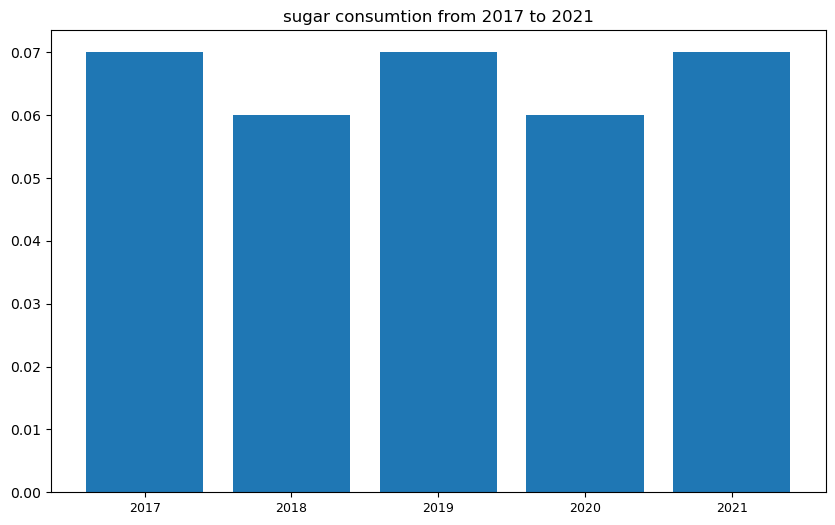

In [114]:
x = np.arange(len(sugar_year)-1)  # 막대의 x좌표
plt.figure(figsize= (10,6))
plt.bar(x, sugar.values.astype('float')) 
plt.ylim(0,None)
plt.xticks(x, ['2017','2018','2019','2020','2021'], fontsize = 9)
plt.title('sugar consumtion from 2017 to 2021')
plt.show()

In [67]:
a = np.array(a)
b = np.array(b)
c = np.array(c)
d = np.array(d)
e = np.array(e)

In [148]:
drink_amount

,음주량별,2010,2010.1,2010.2,2011,2011.1,2011.2,2012,2012.1,2012.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,음주량별,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반,...,일반,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반
1,1~2잔 정도,25.10,30.90,24.30,23.56,27.58,23.03,22.96,29.97,22.10,...,24.02,25.28,26.82,25.11,24.29,27.07,24.00,22.87,26.22,22.58
2,3~4잔 정도,26.80,27.80,26.60,25.47,27.37,25.22,24.30,25.40,24.16,...,22.98,23.80,26.02,23.56,23.44,24.84,23.29,23.81,25.70,23.64
3,5~6잔 정도,17.00,14.30,17.40,16.07,13.34,16.43,15.14,16.14,15.02,...,13.35,14.62,16.26,14.44,14.70,12.85,14.90,19.56,17.25,19.76
4,7~9잔 정도,19.50,19.30,19.50,22.46,19.44,22.86,22.53,18.18,23.07,...,21.30,19.89,17.54,20.15,21.58,22.25,21.51,18.90,17.96,18.98
5,10잔 이상,11.70,7.80,12.30,12.45,12.27,12.47,15.07,10.31,15.65,...,18.35,16.41,13.35,16.74,15.99,12.99,16.30,14.86,12.86,15.04


In [134]:
year = ['2014','2015','2016','2017','2018','2019','2020','2021','2022']

In [135]:
energy_pr.transpose()

,7
특성별(2),19-29세
2014.1,10.4
2015.1,16.8
2016.1,8.6
2017.1,7.4
2018.1,7.3
2019.1,9.9
2020.1,5.9
2021.1,9.0
2022.1,7.5


In [136]:
energy_x = energy_pr.transpose().drop('특성별(2)')
energy_x['year'] = year
energy_x = energy_x.reset_index()[7]
energy_x

0    10.4
1    16.8
2     8.6
3     7.4
4     7.3
5     9.9
6     5.9
7     9.0
8     7.5
Name: 7, dtype: object

In [137]:
activity_x = activity_pr.transpose().drop('특성별(2)')
activity_x['year'] = year
activity_x = activity_x.reset_index()[3]
activity_x

0    72.3
1    66.7
2    61.9
3    65.6
4    63.8
5    62.1
6    57.8
7    61.2
8    69.2
Name: 3, dtype: object

In [138]:
exercise_x = exercise.transpose().drop('통계분류(2)')
exercise_x['year'] = year
exercise_x = exercise_x.reset_index()[8]
exercise_x

0    36.5
1    39.6
2    11.7
3    14.9
4      10
5     7.1
6     8.8
7     8.8
8     9.3
Name: 8, dtype: object

In [139]:
nutrition_x = nutrition_pr.transpose().reset_index()[12]
nutrition_x

0    61.057143
1    61.057143
2         67.9
3         64.1
4         59.2
5         62.2
6         58.4
7         57.6
8         58.0
Name: 12, dtype: object

In [140]:
a

,index,year,rate
0,0,2014,8341.29728
1,1,2015,8341.29728
2,0,2016,8341.29728
3,1,2017,8231.86095
4,2,2018,9318.42133
5,3,2019,9771.60768
6,4,2020,11981.41158
7,5,2021,13547.01628
8,6,2022,15374.95732


In [141]:
search_point_x = a.reset_index()['rate']
search_point_x

0     8341.29728
1     8341.29728
2     8341.29728
3     8231.86095
4     9318.42133
5     9771.60768
6    11981.41158
7    13547.01628
8    15374.95732
Name: rate, dtype: float64

In [142]:
drink_amount

,음주량별,2010,2010.1,2010.2,2011,2011.1,2011.2,2012,2012.1,2012.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,음주량별,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반,...,일반,전체,저소득,일반,전체,저소득,일반,전체,저소득,일반
1,1~2잔 정도,25.10,30.90,24.30,23.56,27.58,23.03,22.96,29.97,22.10,...,24.02,25.28,26.82,25.11,24.29,27.07,24.00,22.87,26.22,22.58
2,3~4잔 정도,26.80,27.80,26.60,25.47,27.37,25.22,24.30,25.40,24.16,...,22.98,23.80,26.02,23.56,23.44,24.84,23.29,23.81,25.70,23.64
3,5~6잔 정도,17.00,14.30,17.40,16.07,13.34,16.43,15.14,16.14,15.02,...,13.35,14.62,16.26,14.44,14.70,12.85,14.90,19.56,17.25,19.76
4,7~9잔 정도,19.50,19.30,19.50,22.46,19.44,22.86,22.53,18.18,23.07,...,21.30,19.89,17.54,20.15,21.58,22.25,21.51,18.90,17.96,18.98
5,10잔 이상,11.70,7.80,12.30,12.45,12.27,12.47,15.07,10.31,15.65,...,18.35,16.41,13.35,16.74,15.99,12.99,16.30,14.86,12.86,15.04


In [143]:
df_target_y = df_target.transpose().reset_index()[2]

In [144]:
y = pd.Series(df_target_y, name = 'Obesity')
x1 = pd.Series(nutrition_x, name = 'Daily_nutrition')
x2 = pd.Series(exercise_x, name ='Exercise')
x3 = pd.Series(search_point_x, name ='Naver_search_Trend')
x4 = pd.Series(activity_x, name = 'Regular_aero')
x5 = pd.Series(energy_x, name = 'Fat_over_eat')
data = pd.concat([y,x1,x2,x3,x4,x5],axis = 1)
data = data.apply(pd.to_numeric)

In [148]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in data.columns:
    if col != 'Obesity':
        tmp = data[col].to_numpy().reshape(-1,1)
        data[col] = scaler.fit_transform(tmp)

In [149]:
from statsmodels.formula.api import ols

model = ols(formula = 'Obesity ~ Daily_nutrition + Exercise + Naver_search_Trend + Regular_aero + Fat_over_eat',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     20.01
Date:                Tue, 24 Dec 2024   Prob (F-statistic):             0.0164
Time:                        11:43:36   Log-Likelihood:                -7.7891
No. Observations:                   9   AIC:                             27.58
Df Residuals:                       3   BIC:                             28.76
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.2000      0

/opt/homebrew/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [150]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = []
    remaining_features = list(data.columns)
    remaining_features.remove(target)
    best_features = []
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            formula = f"{target} ~ {' + '.join(initial_features + [feature])}"
            model = ols(formula, data=data).fit()
            p_values.append((feature, model.pvalues[feature]))
        selected_feature = min(p_values, key=lambda x: x[1])
        if selected_feature[1] < significance_level:
            initial_features.append(selected_feature[0])
            remaining_features.remove(selected_feature[0])
            best_features.append(selected_feature[0])
        else:
            break
    return best_features

In [151]:
result = forward_selection(data= data, target ='Obesity')

In [152]:
result

['Exercise', 'Daily_nutrition']

In [154]:
model = ols(formula = 'Obesity ~  Exercise + Daily_nutrition',data = data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Obesity   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     34.43
Date:                Tue, 24 Dec 2024   Prob (F-statistic):           0.000515
Time:                        11:44:08   Log-Likelihood:                -12.346
No. Observations:                   9   AIC:                             30.69
Df Residuals:                       6   BIC:                             31.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          20.2000      0.389     

/opt/homebrew/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)
